In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\stock_index_price - stock_index_price.csv")
with pd.option_context('display.max_rows', 6): display(df)

,interest_rate,unemployment_rate,stock_index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
...,...,...,...
21,1.75,6.2,822
22,1.75,6.2,704
23,1.75,6.1,719


In [3]:
x1 = df['interest_rate']
x2 = df['unemployment_rate']
y = df['stock_index_price']

x = df[['interest_rate','unemployment_rate']]

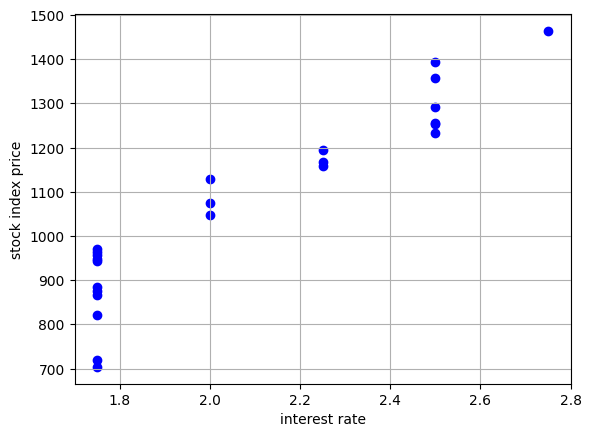

In [10]:
plt.scatter(x1,y, c='b')
plt.xlabel("interest rate")
plt.ylabel("stock index price")
plt.grid()

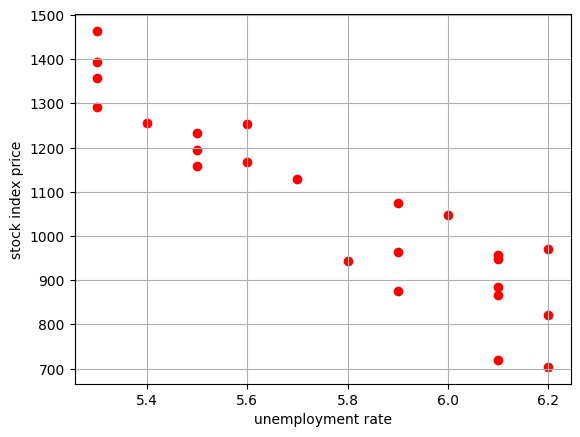

In [11]:
plt.scatter(x2,y, c='r')
plt.xlabel("unemployment rate")
plt.ylabel("stock index price")
plt.grid()

In [14]:
df.corr().round(2)

,interest_rate,unemployment_rate,stock_index_price
interest_rate,1.00,-0.93,0.94
unemployment_rate,-0.93,1.00,-0.92
stock_index_price,0.94,-0.92,1.00


In [13]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

Write code for predict stock price when :\
Interest rate = 2, unemployment rate = 5 and Interest rate = 2.2, unemployment rate = 5.7

In [15]:
q1 = [[2,5]]
q2 = [[2.2,5.7]]

a1 = model.predict(q1)
a2 = model.predict(q2)

c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
for (i,x_p) in enumerate(a1):
    stock_price = '{:,.0f}'.format(a1[i])
    print(f" Interest rate = 2, unemployment rate = 5, stock price = {stock_price}")


for (i,x_p) in enumerate(a2):
    stock_price = '{:,.0f}'.format(a2[i])
    print(f" Interest rate = 2.2, unemployment rate = 5.7, stock price = {stock_price}")

 Interest rate = 2, unemployment rate = 5, stock price = 1,239
 Interest rate = 2.2, unemployment rate = 5.7, stock price = 1,133


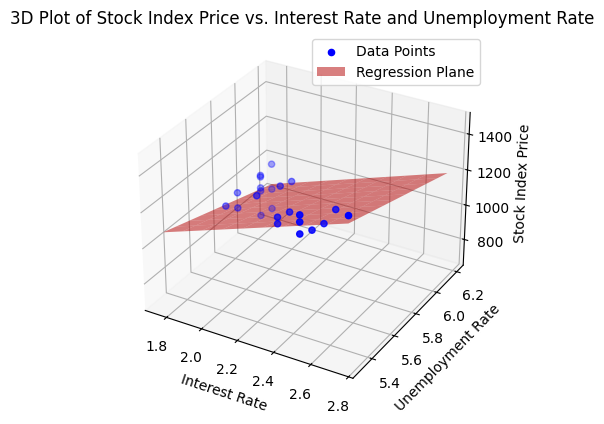

In [23]:
coefs = model.coef_

x1_vals = np.linspace(x['interest_rate'].min(), x['interest_rate'].max(), 10)
x2_vals = np.linspace(x['unemployment_rate'].min(), x['unemployment_rate'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

# Predict y values for the meshgrid
y_pred = coefs[0] * x1_grid + coefs[1] * x2_grid + model.intercept_

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x['interest_rate'], x['unemployment_rate'], y, c='b', marker='o', label='Data Points')

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred, alpha=0.5, color='r', label='Regression Plane')

# Set labels and title
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Unemployment Rate')
ax.set_zlabel('Stock Index Price')
ax.set_title('3D Plot of Stock Index Price vs. Interest Rate and Unemployment Rate')

# Add legend
ax.legend()

plt.show()